<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot



In [2]:
# Import dataset file from google drive.  Can upload from local machine or github as an alternative 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
#loading dataset
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome

In [18]:
# Import 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import svm


In [21]:
# Split the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

linear  kernel train acc:  0.7833876221498371  test acc:  0.7272727272727273
     confusion matrix: [array([0.51298701, 0.08441558]), array([0.18831169, 0.21428571])]
linear  kernel train acc:  0.7833876221498371  test acc:  0.7337662337662337
     confusion matrix: [array([0.51298701, 0.08441558]), array([0.18181818, 0.22077922])]
linear  kernel train acc:  0.7833876221498371  test acc:  0.7337662337662337
     confusion matrix: [array([0.51298701, 0.08441558]), array([0.18181818, 0.22077922])]
linear  kernel train acc:  0.7833876221498371  test acc:  0.7337662337662337
     confusion matrix: [array([0.51298701, 0.08441558]), array([0.18181818, 0.22077922])]
linear  kernel train acc:  0.7833876221498371  test acc:  0.7272727272727273
     confusion matrix: [array([0.50649351, 0.09090909]), array([0.18181818, 0.22077922])]
linear  kernel train acc:  0.7833876221498371  test acc:  0.7272727272727273
     confusion matrix: [array([0.50649351, 0.09090909]), array([0.18181818, 0.22077922])

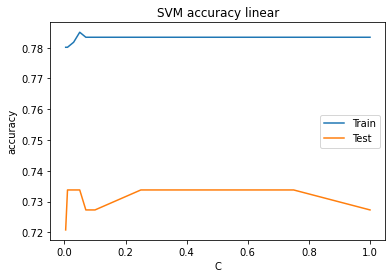

rbf  kernel train acc:  0.7899022801302932  test acc:  0.6883116883116883
     confusion matrix: [array([0.52597403, 0.07142857]), array([0.24025974, 0.16233766])]
rbf  kernel train acc:  0.7833876221498371  test acc:  0.6753246753246753
     confusion matrix: [array([0.52597403, 0.07142857]), array([0.25324675, 0.14935065])]
rbf  kernel train acc:  0.7817589576547231  test acc:  0.6753246753246753
     confusion matrix: [array([0.51948052, 0.07792208]), array([0.24675325, 0.15584416])]
rbf  kernel train acc:  0.7703583061889251  test acc:  0.6688311688311688
     confusion matrix: [array([0.52597403, 0.07142857]), array([0.25974026, 0.14285714])]
rbf  kernel train acc:  0.6986970684039088  test acc:  0.6103896103896104
     confusion matrix: [array([0.57792208, 0.01948052]), array([0.37012987, 0.03246753])]
rbf  kernel train acc:  0.6644951140065146  test acc:  0.5974025974025974
     confusion matrix: [array([0.5974026, 0.       ]), array([0.4025974, 0.       ])]
rbf  kernel train ac

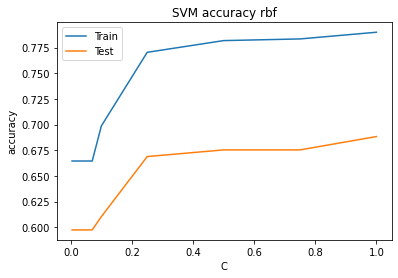

poly  kernel train acc:  0.7947882736156352  test acc:  0.6883116883116883
     confusion matrix: [array([0.53246753, 0.06493506]), array([0.24675325, 0.15584416])]
poly  kernel train acc:  0.7866449511400652  test acc:  0.6948051948051948
     confusion matrix: [array([0.53896104, 0.05844156]), array([0.24675325, 0.15584416])]
poly  kernel train acc:  0.7850162866449512  test acc:  0.6818181818181818
     confusion matrix: [array([0.53896104, 0.05844156]), array([0.25974026, 0.14285714])]
poly  kernel train acc:  0.7801302931596091  test acc:  0.6753246753246753
     confusion matrix: [array([0.53246753, 0.06493506]), array([0.25974026, 0.14285714])]
poly  kernel train acc:  0.7801302931596091  test acc:  0.6948051948051948
     confusion matrix: [array([0.55194805, 0.04545455]), array([0.25974026, 0.14285714])]
poly  kernel train acc:  0.7703583061889251  test acc:  0.6818181818181818
     confusion matrix: [array([0.54545455, 0.05194805]), array([0.26623377, 0.13636364])]
poly  kern

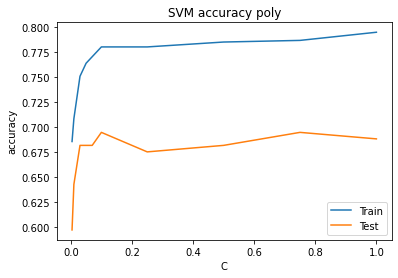

In [23]:
#Loop through the different kernels
kernels = ['linear', 'rbf', 'poly']
Cs = [1, 0.75, 0.5, 0.25, 0.1, 0.07, 0.05, 0.03, 0.01, 0.004]

for mykernel in kernals:
   #optional soft margin parameter ; soft margin = 1 means no soft margin.
   train_acc=[]
   test_acc=[]
   for i in range(len(Cs)):
      #Create SVM classifer object
      model = svm.SVC(kernel=mykernel, C=Cs[i])
      # Train SVM Classifer
      model = model.fit(x_train,y_train)

      #print results
      train_acc.append(metrics.accuracy_score(y_train,  model.predict(x_train)))
      test_acc.append(metrics.accuracy_score(y_test,  model.predict(x_test)))
      print(mykernel," kernel train acc: ", train_acc[i], " test acc: ", test_acc[i])
      cm=confusion_matrix(y_test, model.predict(x_test))
      print("     confusion matrix:", list(cm/cm.sum()))

   #plot results
   pyplot.plot(Cs, train_acc, label='Train')
   pyplot.plot(Cs, test_acc, label='Test')
   pyplot.title('SVM accuracy '+mykernel )
   pyplot.ylabel('accuracy')
   pyplot.xlabel('C')
   pyplot.legend(loc='best')
   pyplot.show()
